## Task 1 - Part 1

#### Step 1 − Import the necessary packages

In [1]:
# Importar bibliotecas necessárias
import numpy as np
import random
import matplotlib.pyplot as plt  # Corrigido plt00 para plt
from sklearn.linear_model import Ridge, Lasso, RANSACRegressor, LinearRegression  # Unificado as importações do sklearn.linear_model
from sklearn.model_selection import GridSearchCV, train_test_split  # Unificado imports de model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statsmodels import robust  # statsmodels não conflita com sklearn, então permanece
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tensorflow_addons as tfa

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau, EarlyStopping
from sklearn.utils import class_weight

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import Adam

from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, balanced_accuracy_score


from tensorflow.keras.layers import BatchNormalization

from sklearn.model_selection import KFold
from tensorflow.keras import backend as K




print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
    


2024-10-27 19:29:59.068338: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-27 19:29:59.268639: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-27 19:30:00.070869: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/olivas/ml_2/lib/python3.8/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a pla

Num GPUs Available:  1


2024-10-27 19:30:02.389840: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-27 19:30:02.419438: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-27 19:30:02.420849: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

#### Step 1.5 − Picture visulazer

In [2]:
# Função para visualizar as imagens e seus rótulos (predictions)
def img_view(dataset, labels=None, num_imgs=5, start_idx=0):
    """
    Função que visualiza um número especificado de imagens a partir de um índice inicial.
    
    Parâmetros:
    - dataset: Conjunto de imagens a visualizar.
    - labels: (Opcional) Rótulos das imagens ou previsões, se disponíveis.
    - num_imgs: Número de imagens a visualizar.
    - start_idx: Índice inicial para começar a visualização das imagens.
    """
    # Verificar quantas imagens existem no dataset
    num_imgs = min(num_imgs, len(dataset) - start_idx)  # Garante que não tentas visualizar mais imagens do que as disponíveis

    # Criar a figura para visualização
    plt.figure(figsize=(15, 5))  # Ajuste o tamanho da figura
    
    for i in range(num_imgs):
        idx = start_idx + i  # Usar o índice inicial fornecido
        
        # Mostrar a imagem original
        plt.subplot(2, num_imgs, i + 1)
        plt.imshow(dataset[idx], cmap='gray')  # Exibir a imagem original
        plt.axis('off')
        plt.title(f"Image {idx}")
        
        # Se os rótulos/previsões estiverem disponíveis, mostrá-los
        if labels is not None:
            plt.subplot(2, num_imgs, num_imgs + i + 1)
            plt.imshow(labels[idx], cmap='gray')  # Exibir a previsão ou rótulo correspondente
            plt.axis('off')
            plt.title(f"Prediction {idx}")

    plt.show()


# Função para exibir a matriz de confusão
def plot_confusion_matrix(Y_true, Y_pred, model_name="Modelo"):
    """
    Função para calcular e plotar a matriz de confusão.
    
    Parâmetros:
    - Y_true: Rótulos verdadeiros.
    - Y_pred: Rótulos previstos.
    - model_name: Nome do modelo (para o título do gráfico).
    """
    # Calcular a matriz de confusão
    cm = confusion_matrix(Y_true, Y_pred)

    # Plotar a matriz de confusão usando Seaborn
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.title(f"Matriz de Confusão - {model_name}")
    plt.xlabel('Rótulos Previstos')
    plt.ylabel('Rótulos Verdadeiros')
    plt.show()



#### Step 2 − Load the dataset

X_train shape antes do reshape: (547, 2304)
X_train shape depois do reshape: (547, 48, 48)


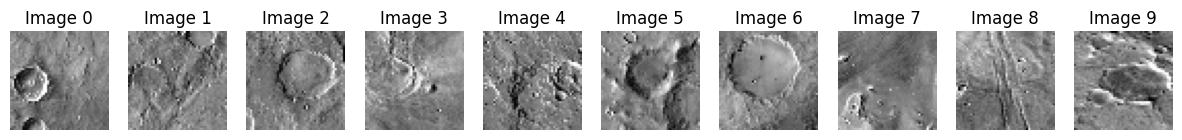

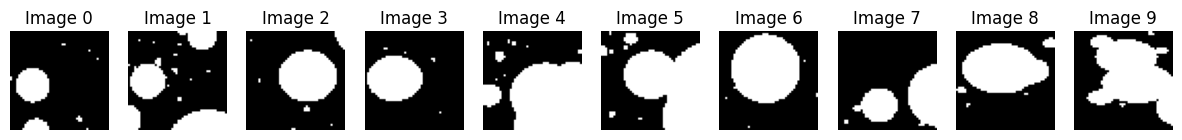

In [3]:
# Carregar os dados
X_test_a = np.load('Xtest2_a.npy')
X_test_b = np.load('Xtest2_b.npy')
X_train_a = np.load('Xtrain2_a.npy')
X_train_b = np.load('Xtrain2_b.npy')
Y_train_a = np.load('Ytrain2_a.npy')
Y_train_b = np.load('Ytrain2_b.npy')

# Verificar as dimensões dos datasets antes do reshape
print(f"X_train shape antes do reshape: {X_train_b.shape}")

# Reformatar as imagens para o formato correto (48, 48)
X_train_b= X_train_b.reshape(-1, 48, 48)
X_test_b = X_test_b.reshape(-1, 48, 48)
Y_train_b = Y_train_b.reshape(-1, 48, 48)

print(f"X_train shape depois do reshape: {X_train_b.shape}")
#############################################3
# Variável para controlar quantas imagens queres visualizar
num_imagens = 10  # Podes alterar este número para visualizar mais ou menos imagens
#######################################3


# Visualizar imagens de treino com rótulos
#img_view(X_train_b, Y_train_b, num_imgs=num_imagens)

# Visualizar imagens de teste (sem rótulos)
img_view(X_train_b, num_imgs=num_imagens)

img_view(Y_train_b, num_imgs=num_imagens)




#### Step 2.5 - processamento

(492, 48, 48, 1)
(492, 48, 48, 1)
(55, 48, 48, 1)
(55, 48, 48, 1)


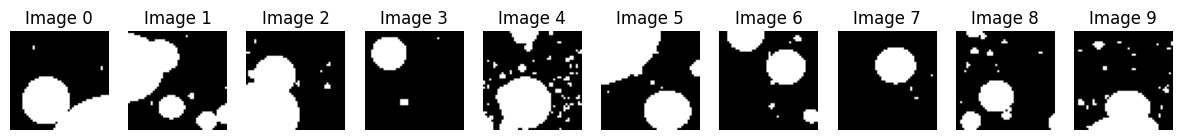

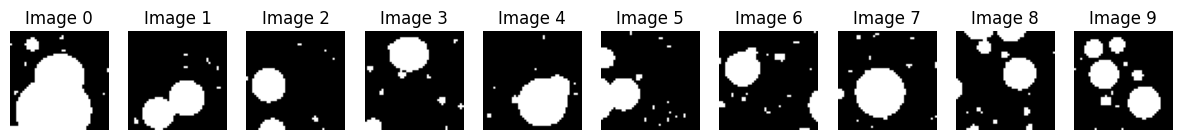

In [4]:
# 2. Preprocessamento: Reshape e Normalização
# Ajustar a forma das imagens para (48, 48, 1) para incluir o canal de cor (grayscale)
# A CNN espera 4 dimensões: (número de amostras, altura, largura, número de canais)
X_train_b= X_train_b.reshape(-1, 48, 48, 1)
X_test_b = X_test_b.reshape(-1, 48, 48, 1)
Y_train_b = Y_train_b.reshape(-1, 48, 48, 1)

# Normalizar os valores dos píxeis para estar entre 0 e 1, dividindo por 255
# Isto ajuda o modelo a convergir melhor durante o treino
X_train_b = X_train_b / 255.0
X_test_b = X_test_b / 255.0

X_train_b, X_val_b, Y_train_b, Y_val_b = train_test_split(X_train_b, Y_train_b, test_size=0.1, random_state=40)

print(X_train_b.shape)
print(Y_train_b.shape)
print(Y_val_b.shape)
print(X_val_b.shape)

img_view(Y_train_b, num_imgs=10)
img_view(Y_val_b, num_imgs=10)


#### K-NN

Shapes - X_train: (492, 2304), X_val: (492, 2304)
Original Images


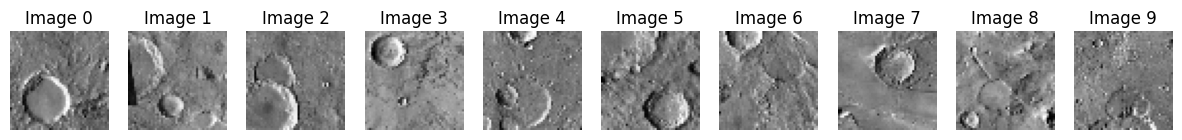

Original Output


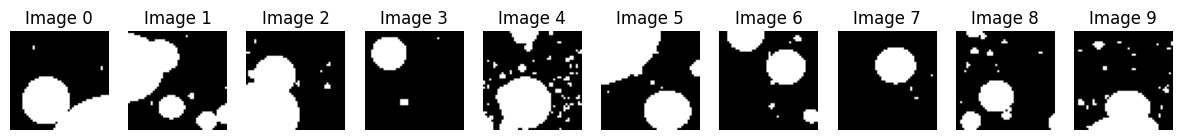

Predicted Output


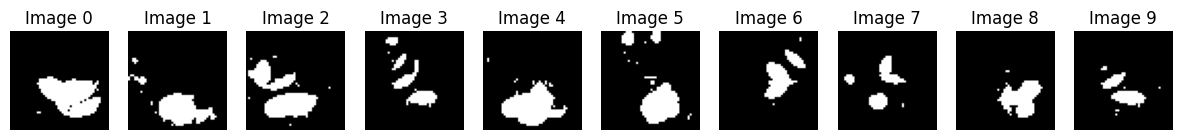

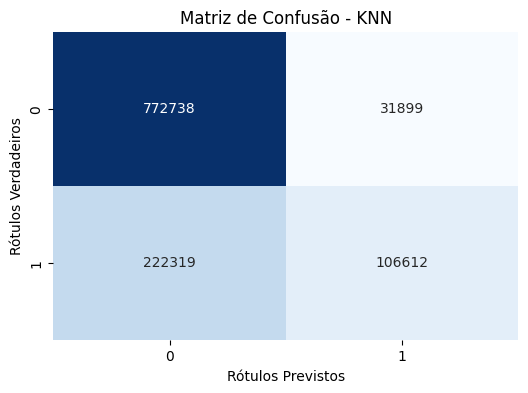

Balanced Accuracy: 0.6422363221834353


In [5]:
from sklearn.neighbors import KNeighborsClassifier
# Standardize the data for k-NN
# Flatten each 48x48 image for k-NN
X_train_flat = X_train_b.reshape(len(X_train_b), 48 * 48)  # (num_samples, 2304)
Y_train_flat = Y_train_b.reshape(len(Y_train_b), 48 * 48)  # (num_samples, 2304)
# Flatten each 48x48 image for k-NN
X_val_flat = X_train_b.reshape(len(X_train_b), 48 * 48)  # (num_samples, 2304)
Y_val_flat = Y_train_b.reshape(len(Y_train_b), 48 * 48)  # (num_samples, 2304)


scaler = StandardScaler()
X_train_flat = scaler.fit_transform(X_train_flat)
X_val_flat = scaler.transform(X_val_flat)

print(f"Shapes - X_train: {X_train_flat.shape}, X_val: {X_val_flat.shape}")

# Reshape `X_val_flat` and `Y_val_flat` back to 48x48 for visualization
X_val_b_reshaped = X_val_flat.reshape(-1, 48, 48)
Y_val_b_reshaped = Y_val_flat.reshape(-1, 48, 48)


# %% [markdown]
# #### Step 4 − Define and Train the k-NN Model

# %%
# Initialize the k-NN classifier
k = 5  # Choose k based on validation or experimentation
knn = KNeighborsClassifier(n_neighbors=k)

# Train the k-NN model
knn.fit(X_train_flat, Y_train_flat)

# Predict on validation data
val_predictions = knn.predict(X_val_flat)

# Reshape the predictions to the original 48x48 format for visualization
val_predictions_reshaped = val_predictions.reshape(-1, 48, 48)

# Visualize validation images and their true vs. predicted labels
print("Original Images")
img_view(X_val_b_reshaped, num_imgs=10)
print("Original Output")
img_view(Y_val_b_reshaped, num_imgs=10)
print("Predicted Output")
img_view(val_predictions_reshaped, num_imgs=10)

# %% [markdown]
# #### Step 6 − Evaluation Metrics

# %%
# Flatten the predictions and true labels for metric calculation
Y_val_flat = Y_val_flat.flatten()
val_predictions_flat = val_predictions.flatten()

# Compute balanced accuracy
balanced_acc = balanced_accuracy_score(Y_val_flat, val_predictions_flat)

# Confusion matrix
conf_matrix = confusion_matrix(Y_val_flat, val_predictions_flat)

plot_confusion_matrix(Y_val_flat, val_predictions_flat, model_name='KNN')

# Output the results
print(f"Balanced Accuracy: {balanced_acc}")


#### Step 3 - Classs imbalance

In [6]:

def dice_loss(y_true, y_pred):
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
    return 1 - (2. * intersection + 1) / (tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f) + 1)

def combo_loss(y_true, y_pred, alpha=0.5):
    dice = dice_loss(y_true, y_pred)
    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    return alpha * bce + (1 - alpha) * dice



#### Step 3 −Definir a arquitetura da cnn 

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
#kernel_regularizer=regularizers.l2(l2_lambda)

def unet_model(input_size=(48, 48, 1), l2_lambda=0.001, dropout_rate=0.1):
    inputs = layers.Input(input_size)

    # Encoder 1
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                      )(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                       )(c1)
    
   
    p1 = layers.MaxPooling2D((2, 2))(c1)

    #Encoder 2
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same',
                       )(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same',
                       )(c2)
    
    p2 = layers.MaxPooling2D((2, 2))(c2)

    #Encoder 3 

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same',
                       )(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same',
                       )(c3)
    
    p3 = layers.MaxPooling2D((2, 2))(c3)

    # Bottleneck
    c4 = layers.Conv2D(256, (3, 3), activation='relu', padding='same',
                       )(p3)
    c4 = layers.Conv2D(256, (3, 3), activation='relu', padding='same',
                       )(c4)
   

    # Decoder 1
    u1 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c4)
    u1 = layers.concatenate([u1, c3])
    c5 = layers.Conv2D(256, (3, 3), activation='relu', padding='same',
                       )(u1)
    c5 = layers.Conv2D(256, (3, 3), activation='relu', padding='same',
                       kernel_regularizer=regularizers.l2(l2_lambda))(c5)
    c5 = layers.Dropout(dropout_rate)(c5) 

    #Decoder 2
    u2 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u2 = layers.concatenate([u2, c2])
    c6 = layers.Conv2D(128, (3, 3), activation='relu', padding='same',
                       kernel_regularizer=regularizers.l2(l2_lambda))(u2)
    c6 = layers.Conv2D(128, (3, 3), activation='relu', padding='same',
                       kernel_regularizer=regularizers.l2(l2_lambda))(c6)
    c6 = layers.Dropout(dropout_rate)(c6)  

    #Decoder 3
    u3 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u3 = layers.concatenate([u3, c1])
    c7 = layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                       kernel_regularizer=regularizers.l2(l2_lambda))(u3)
    c7 = layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                       kernel_regularizer=regularizers.l2(l2_lambda))(c7)
    c7 = layers.Dropout(dropout_rate)(c7)  

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c7)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

# Compile the model
model = unet_model()



# Compile the model with the focal loss function
#model.compile(optimizer='adam', loss=focal_loss(gamma=0.2, alpha=0.25), metrics=['accuracy'])

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss=lambda y_true, y_pred: combo_loss(y_true, y_pred, alpha=0.35), metrics=['accuracy'])




2024-10-27 19:30:06.915370: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-27 19:30:06.917131: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-27 19:30:06.918532: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

#### Step 3 - Original model

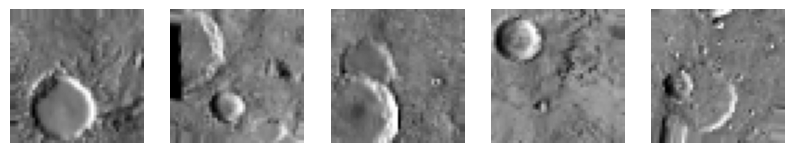

Epoch 1/100


2024-10-27 19:30:09.598081: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-10-27 19:30:10.566132: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8907
2024-10-27 19:30:11.457436: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-10-27 19:30:11.478894: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f53ace02870 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-10-27 19:30:11.478942: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-10-27 19:30:11.493084: I tensorflow/compiler/mlir/tensorflow/utils/dump_ml

16/16 [==============================] - 26s 548ms/step - loss: 1.0778 - accuracy: 0.6645 - val_loss: 0.8696 - val_accuracy: 0.4744 - lr: 0.0010
Epoch 2/100
16/16 [==============================] - 2s 103ms/step - loss: 0.7724 - accuracy: 0.6544 - val_loss: 0.6929 - val_accuracy: 0.6311 - lr: 0.0010
Epoch 3/100
16/16 [==============================] - 2s 106ms/step - loss: 0.6654 - accuracy: 0.6687 - val_loss: 0.6082 - val_accuracy: 0.7021 - lr: 0.0010
Epoch 4/100
16/16 [==============================] - 2s 98ms/step - loss: 0.6077 - accuracy: 0.7123 - val_loss: 0.6599 - val_accuracy: 0.6126 - lr: 0.0010
Epoch 5/100
16/16 [==============================] - 2s 98ms/step - loss: 0.5697 - accuracy: 0.7331 - val_loss: 0.5822 - val_accuracy: 0.6657 - lr: 0.0010
Epoch 6/100
16/16 [==============================] - 2s 95ms/step - loss: 0.5446 - accuracy: 0.7396 - val_loss: 0.5352 - val_accuracy: 0.7284 - lr: 0.0010
Epoch 7/100
16/16 [==============================] - 2s 98ms/step - loss: 0.52

In [8]:
# Ensure the ground truth labels have shape (batch_size, height, width, 1)
# Ensure the ground truth labels have shape (batch_size, height, width, 1)
#Y_train_b = np.expand_dims(Y_train_b, axis=-1)
#Y_val_b = np.expand_dims(Y_val_b, axis=-1)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, min_lr=0.000001)


# Function to display images in a grid
def plot_augmented_images(datagen, X_train, num_images=5):
    plt.figure(figsize=(10, 10))
    
    for i in range(num_images):
        # Generate augmented images using flow method
        augmented_images = datagen.flow(np.expand_dims(X_train[i], 0), batch_size=1)
        
        # Get the first augmented image
        aug_img = next(augmented_images)[0]
        
        plt.subplot(1, num_images, i + 1)
        plt.imshow(aug_img.squeeze(), cmap='gray')
        plt.axis('off')

    plt.show()


datagen = ImageDataGenerator(
    rotation_range=10,          # Rotate images by up to 10 degrees
    width_shift_range=0.05,      # Shift images horizontally by 10%
    height_shift_range=0.05,     # Shift images vertically by 10%
   
       # Fill any missing pixels after transformation
)

plot_augmented_images(datagen, X_train_b, num_images=5)

datagen.fit(X_train_b)



history = model.fit(datagen.flow(X_train_b, Y_train_b, batch_size=32), validation_data=(X_val_b, Y_val_b), epochs=100, callbacks=[early_stopping, reduce_lr])


#### Step 7 − View model


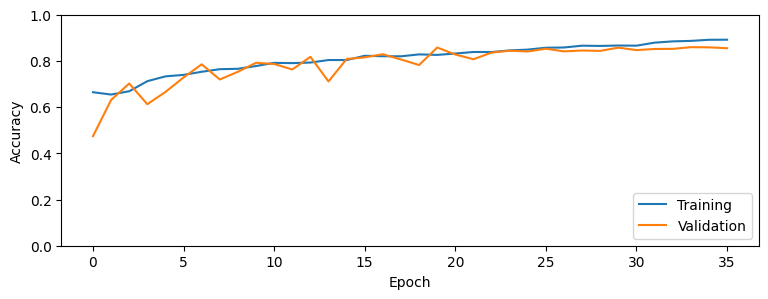

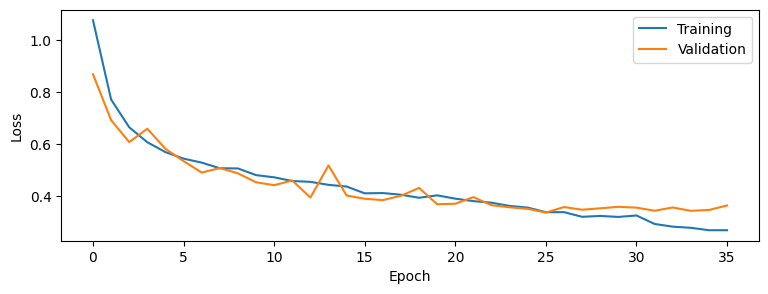

In [9]:
# 7. Gráficos da precisão de treino e validação
# - Visualizamos como a precisão evoluiu ao longo das épocas
plt.figure(figsize=(9, 3))
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(9, 3))
# Se quiseres visualizar também a perda, podes usar:
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

#### Step - Evaluation metrics

2/2 [==============================] - 1s 18ms/step
Original images


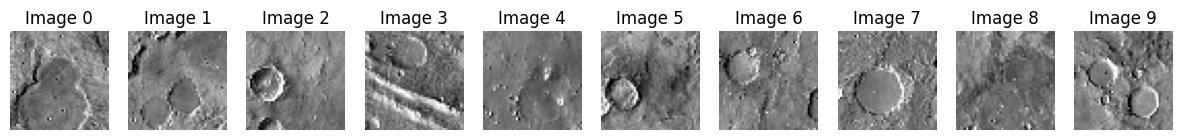

Original Output


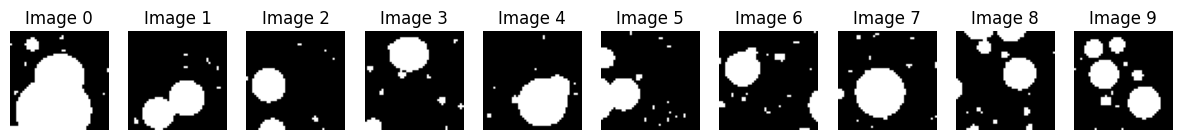

Predicted Output


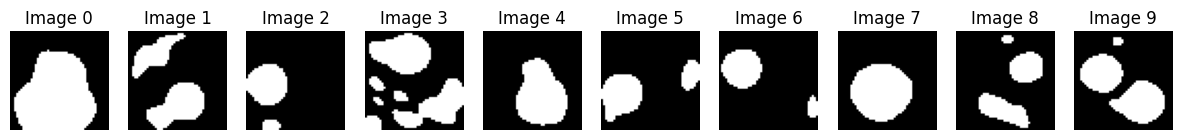

(55, 48, 48, 1)
(55, 48, 48, 1)
Flattened Y_val_b shape: (126720,)
Flattened predictions shape: (126720,)


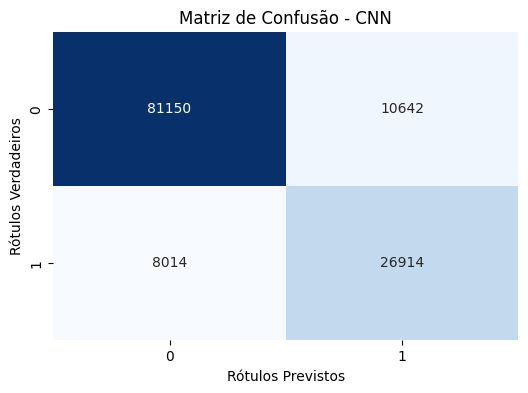

Balanced Accuracy: 0.8273102721195388


In [10]:
val_predictions = model.predict(X_val_b)
val_predictions = (val_predictions > 0.5).astype(np.uint8)



# Visualize test images and their predicted masks
print("Original images")
img_view(X_val_b, num_imgs=10)
print("Original Output")
img_view(Y_val_b, num_imgs=10)
print("Predicted Output")
img_view(val_predictions, num_imgs=10)


print(Y_val_b.shape)
print(val_predictions.shape)

Y_val_b=Y_val_b.flatten()
val_predictions=val_predictions.flatten()

# 4. Check if they have the same length after flattening
print(f"Flattened Y_val_b shape: {Y_val_b.shape}")
print(f"Flattened predictions shape: {val_predictions.shape}")


# Compute balanced accuracy
balanced_acc = balanced_accuracy_score(Y_val_b, val_predictions)



plot_confusion_matrix(Y_val_b, val_predictions, model_name='CNN')

# Output the results
print(f"Balanced Accuracy: {balanced_acc}")


7/7 [==============================] - 1s 91ms/step


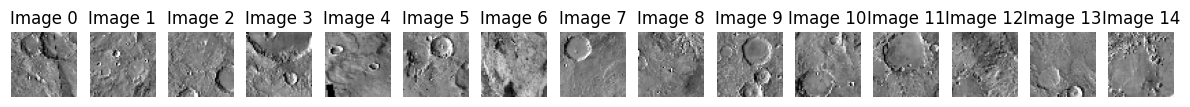

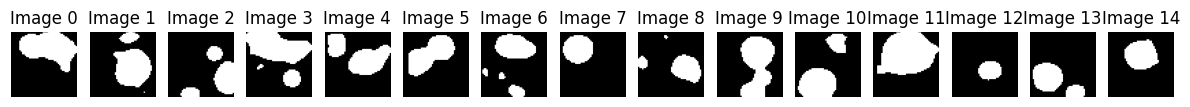

(196, 48, 48, 1)
(196, 2304)


In [11]:
Y_pred = (model.predict(X_test_b) > 0.5).astype("int32")
img_view(X_test_b, num_imgs=15)
img_view(Y_pred, num_imgs=15)

Y_pred = Y_pred.reshape(196, 48 * 48)
print(X_test_b.shape)
print(Y_pred.shape)


#np.save('ytest_pred.npy', Y_pred)


In [12]:
np.save('ytest_pred.npy', Y_pred)